# Notes et exercices
Créé par Michel-Pierre Coll - 2022, michel-pierre.coll@psy.ulaval.ca

## 0. Instructions - calepin interactifs

Les simulations et l'interaction sont une excellente façon de comprendre certains concepts statistiques. Au cours de la session nous utiliserons régulièrement des simulations pour illuster certains concepts.

Ces simulations sont effectuées en utilisant des documents comme celui-ci ("calepins" ou *notebooks*) qui contiennent des explications et des "cellules" qui permettent d'exécuter le langage de programmation *Python*. Dans la majorité des cas, le code sera caché. Il vous sera parfois demandé de changer quelques paramètres dans le code pour évaluer leur effet sur les résultats à l'aide de boutons. **LA COMPRÉHENSION DU CODE DANS LES CELLULES N'EST PAS NÉCESSAIRE POUR LE COURS.** Si vous aimeriez comprendre comment les simulations sont effectuées, vous pouvez cliquer sur "Show code".


Pour débuter, exécutez le calepin en allant dans le le menu "Runtime -> Run all" ci-haut.

In [ ]:
#@title Pour débuter, exécutez le calepin en allant dans le le menu "Runtime -> Run all" ci-haut.
%%capture
!pip install - r https://raw.githubusercontent.com/saeedehsp/psy-7000/main/requirements.txt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import stats
import base64
import numpy as np
from ipywidgets import interact_manual
from matplotlib import rc
import matplotlib
import matplotlib.font_manager as fm
from tqdm.notebook import tqdm
import seaborn as sns
ranfirst = 1
%config InlineBackend.figure_format='retina'


!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf;
fm.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')


$\color{blue}{---------------------------------}$


## 3.0 Comparaisons multiples et erreur de type 1

Au dernier cours, nous avons discuté de l'analyse de d'expériences avec une seule variable indépendante (VI) avec deux niveaux, ou la comparaison de deux moyennes.

Toutefois, plusieurs plans d'expériences nécessitent la comparaison de plus de deux moyennes.

Une stratégie potentielle serait comparer toutes les paires de moyennes possibles et déterminer lesquelles peuvent être considérées comme significativement différentes. Par exemple, pour un plan d'expérience avec une VI avec quatre niveaux, les hypothèses nulles bilatérales seraient:

$$\mu_1 = \mu_2$$
$$\mu_1 = \mu_3$$
$$\mu_1 = \mu_4$$
$$\mu_2 = \mu_3$$
$$\mu_2 = \mu_4$$
$$\mu_3 = \mu_4$$

De façon générale, on peut obtenir le nombre de comparaisons possibles en fonction du nombre de niveaux $k$ à partir de l'équation:

$$n_{comp} = k(k-1)/2$$

Si nous utilisons une seuil alpha de 0.05 pour chacune de ces comparaisons, la probabilité globale de faire une erreur de type 1 augmente selon l'équationL

$$1 - (1- \alpha)^{n_{comp}}$$

La figure ci-dessous montre la relation entre le nombre de niveaux d'un plan d'expérience à une VI, le nombre de comparaisons possibles et la probabilité globale de commettre au moins une erreur de type 1.

---
### Exercices:
1. Si vous décidez d'utiliser une correction de Bonferroni, quel impact est-ce que cela aura sur la puissance statistique de votre devis expérimental si vous avez plus de deux niveaux?


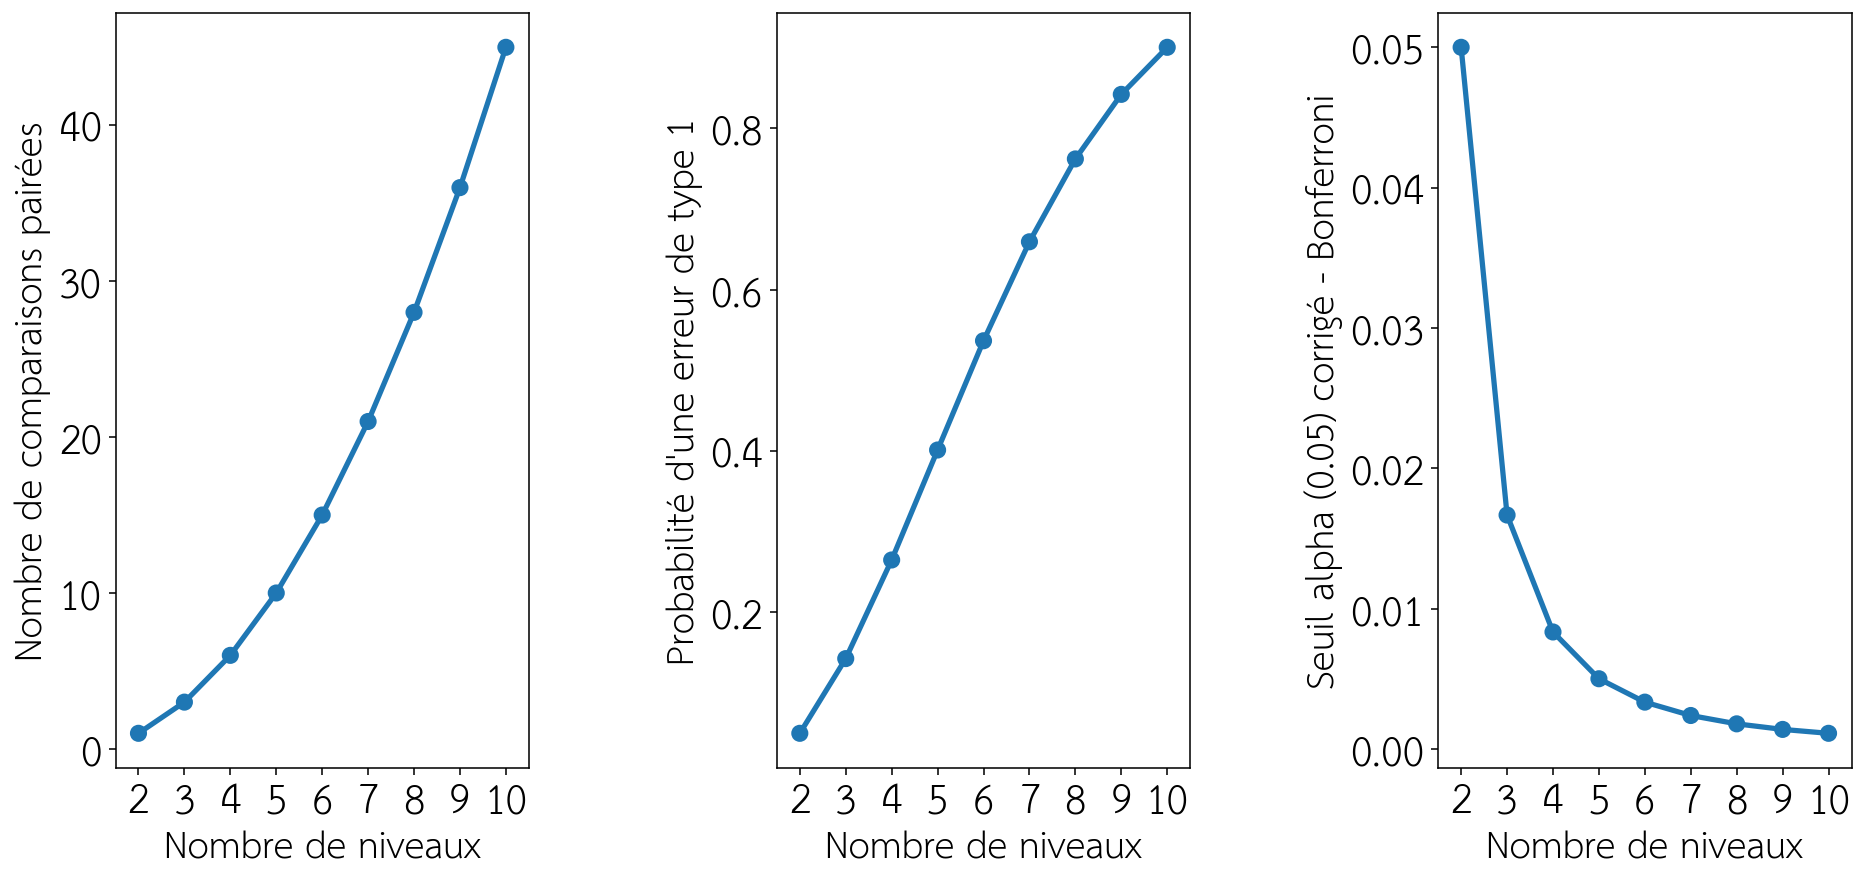

In [ ]:
#@title Exemple 3.0

def multiple_comp():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)


    # Graph 1, nob de niveaux, vs nombre de traitement
    # Graph 2, nomb de niveaux vs erreur alpha
    niv = np.arange(2, 11)

    ncomp = [k*(k-1)/2 for k in niv]
    type1 = [1-(1-0.05)**n for n in ncomp]
    alpha_corr = [0.05/n for n in ncomp]
    fig, axes= plt.subplots(1, 3, figsize=(16, 7), dpi=70)
    sns.pointplot(x=niv, y=ncomp, ax=axes[0])
    sns.pointplot(x=niv, y=type1, ax=axes[1])
    sns.pointplot(x=niv, y=alpha_corr, ax=axes[2])

    axes[0].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)
    axes[2].tick_params(labelsize=20)

    axes[1].set_xlabel("Nombre de niveaux", fontsize=18)
    axes[0].set_xlabel("Nombre de niveaux", fontsize=18)
    axes[0].set_ylabel('Nombre de comparaisons pairées', fontsize=18)
    axes[1].set_ylabel("Probabilité d'une erreur de type 1", fontsize=18)
    axes[0].set_ylabel('Nombre de comparaisons pairées', fontsize=18)
    axes[1].set_ylabel("Probabilité d'une erreur de type 1", fontsize=18)

    axes[2].set_xlabel("Nombre de niveaux", fontsize=18)
    axes[2].set_ylabel('Seuil alpha (0.05) corrigé - Bonferroni', fontsize=18)
    plt.subplots_adjust(wspace=0.6)
    # plt.tight_layout()


multiple_comp()

$\color{blue}{---------------------------------}$


#3.1 L'analyse de variance

Afin d’éviter cette inflation de la probabilité de faire une erreur de type 1, nous pouvons effectuer un seul test pour évaluer si notre variable indépendante a un effet significatif sur la variable dépendante.

Lors du dernier cours, nous avons discuté du test-t comme d’un ratio entre la variance expliqué par la manipulation et de celle non-expliquée par la manipulation (erreur).

Nous pouvons généraliser cette approche à ≥3 niveaux dans le cadre de l’analyse de la variance (ANOVA).

La figure ci-dessous illustre les principales sources de variance qui doivent être considérées lors de l'analyse de la variance.

La variance totale, soit toute déviation de la grande moyenne de l'échantillon complet.

La variance de la manipulation, soit la varaince qui est dû à notre manipulation. Cette variance est la différence entre la moyenne de chaque groupe et la grande moyenne.

La variance erreur, soit le reste de la variance totale qui n'est pas expliquée par notre manipulation.



---
## Exercices:
1. Pour un traitement n'ayant aucun effet (effet == 0):
    * Quelle est la correspondance entre la variance totale et la variance erreur?
    * Quelle est la correspondance entre la moyenne de chaque groupe et la grande moyenne?
2. Pour un traitement ayant un grand effet (effet > 3):
    * Est-ce que changer la magnitude de l'erreur change la différence entre les moyennes des groupes?
    * Est-ce que changer la magnitude de l'erreur change la taille de l'effet?
---

**effet**: Effet de la manipulation (0 = aucun effet).

**erreur**: magnitude de la variance non expliquée.



In [ ]:
#@title Exemple 3.1

def ttest_two_samples_glm(effet=1,  erreur=1):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    mu = 0
    mu2 = mu + effet
    mu3 = mu - effet
    mu4 = mu + 0.5*effet

    sigma = erreur
    n1, n2, n3 = 20, 20, 20

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n1)
    groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n2)
    groupe3 = np.random.normal(loc=mu3, scale=sigma, size=n3)
    groupe4 = np.random.normal(loc=mu4, scale=sigma, size=n3)


    fig, axes= plt.subplots(1, 4, figsize=(23, 8), dpi=70)


    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B', 'C', 'D'])


    axes[0].set_title("Derniers échantillons aléatoires", fontsize=17)
    axes[0].set_ylabel('Mesure', fontsize=17)
    axes[0].set_xlabel('Groupes', fontsize=17)

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[3], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': 'k', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False,)

    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)


    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[1], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=False,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)

    gmean = np.mean(list(groupe1)+list(groupe2))

    sub_means = [np.mean(groupe1), np.mean(groupe2), np.mean(groupe3), np.mean(groupe4)]

    for i, j, k, l in tqdm(zip(groupe1, groupe2, groupe3, groupe4), total=n1):
        jitt = np.random.uniform(low=-0.3, high=0.3, size=1)
        axes[3].scatter(0+jitt, i, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(1+jitt, j, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(2+jitt, k, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(3+jitt, l, color='#FFAB40', s=80, alpha=0.6)

        axes[3].plot([1+jitt, 1+jitt], [np.mean(groupe2), j], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([0+jitt, 0+jitt], [np.mean(groupe1), i], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([2+jitt, 2+jitt], [np.mean(groupe3), k], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([3+jitt, 3+jitt], [np.mean(groupe4), l], color='#FFAB40', linestyle='--', alpha=0.6)

        axes[1].scatter(1+jitt, j, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(0+jitt, i, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(2+jitt, k, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(3+jitt, l, color='#ff4050', s=80, alpha=0.6)

        axes[1].plot([1+jitt, 1+jitt], [gmean, j], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([0+jitt, 0+jitt], [gmean, i], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([2+jitt, 2+jitt], [gmean, k], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([3+jitt, 3+jitt], [gmean, l], color='#ff4050', linestyle='--', alpha=0.6)


        axes[2].plot([1+jitt, 1+jitt], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([0+jitt, 0+jitt], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([2+jitt, 2+jitt], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([3+jitt, 3+jitt], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)


    axes[1].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')
    axes[2].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')

    axes[2].plot([0, 0], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([1, 1], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([2, 2], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([3, 3], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)

    all = list(groupe1)+list(groupe2)+list(groupe3)+list(groupe4)
    axes[1].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[2].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[0].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[3].set_ylim(np.min(all)-0.2, np.max(all)+0.2)

    axes[2].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)
    axes[0].tick_params(labelsize=20)
    axes[3].tick_params(labelsize=20)
    axes[1].legend(fontsize=12)


    # sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B'], jitter=0.3)
    axes[3].set_title("Variance erreur (non-expliquée)", fontsize=17)
    axes[3].set_ylabel('Mesure', fontsize=17)
    axes[3].set_xlabel('Groupes', fontsize=17)

    axes[2].set_title("Variance de la manipulation", fontsize=17)
    axes[2].set_ylabel('Mesure', fontsize=17)
    axes[2].set_xlabel('Groupes', fontsize=17)

    axes[1].set_title("Variance totale", fontsize=17)
    axes[1].set_ylabel('Mesure', fontsize=17)
    axes[1].set_xlabel('Groupes', fontsize=17)

    # axes[3].set_xlim(axes[2].get_xlim())
    # axes[3].set_xticks([0, 1])
    # axes[3].set_xticklabels(['$X_{1}$', '$X_{2}$'])
    # sns.regplot([0, 1, 2], [np.mean(groupe1), np.mean(groupe2), np.mean(groupe3)], ax=axes[3], ci=None, truncate=False, color='#4285F4', label='Modèle alternatif')

    axes[3].axhline(gmean, linestyle='--', color='gray', label='Grande Moyenne')
    axes[3].legend(fontsize=12)
    axes[2].legend(fontsize=12)
    plt.subplots_adjust(wspace=0.3)


    plt.show()



interactive_plot = interact_manual(ttest_two_samples_glm, effet=(0, 5, 1), erreur=(0.1, 5, 0.5))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=1, description='effet', max=5), FloatSlider(value=1.0, description='erre…

$\color{blue}{---------------------------------}$


##3.1.1 Somme des carrés
Pour procéder à l'analyse de la variance, nous devons être en mesure de quantifier chacune de ce sources de variance.

Nous pouvons donc calculer la **somme des carrés** pour chacune de ces sources de variance.

La **somme des carrés totale (SCT)** quantifie la variance totale de l'échantillon. Il s'agit de la somme de la différence entre chaque observation ($Y_i$) et la grande moyenne de l'échantillon ($\bar{Y}_{..}$). Ces différences sont élevées au carré puisque nous ne sommes pas intéressé par la direction de la différence. Nous prenons ensuite la somme de toutes ces différences.

$$SCT = \sum_{i=1}^{N} (Y_i - \bar{Y}_{..})^2 $$

La **somme des carrés facteur (SCF)** quantifie la variance due à notre manipulation. Il s'agit de la somme de la différence au carré entre la moyenne de chaque groupe ($\bar{Y_j}$) et la grande moyenne ($\bar{Y}_{..}$). Puisque nous assumons que notre manipulation a le même effet sur chaque observation, nous multiplions cette somme par la taille de du groupe $n_j$.

$$SCF = \sum_{j=1}^{t} n_j(\bar{Y_j} - \bar{Y}_{..})^2 $$

La **somme des carrés erreur (SCE)** quantifie la variance qui n'est pas due à notre manipulation. Il s'agit de la somme de la différence au carré entre chaque observation ($\bar{Y_ij}$) et la moyenne de son groupe.

$$SCE = \sum_{j=1}^{t} \sum_{i=1}^{n_j}(Y_{ij} - \bar{Y_j})^2 $$

En utilisant les sommes des carrés, nous pouvons obtenir la statistique $R^2$, soit le ratio entre la variance expliquée par notre manipulation et la variance totale.

$$R^2 = \frac{SCF}{SCT}$$


La figure ci-dessous reproduit la figure précédente en ajoutant le calcul de ces sommes de carrés et de la statistique $R^2$.


---
## Exercices:
1. Comment pouvez-vous obtenir sa somme des carrés totale en utilisant la somme des carrés facteur et erreur?
2. Est-it possible d'obtenir un grand $R^2$ si la manipulation a un effet seulement sur un groupe (e.g. effet_g2 = 0, effet_g3 = 0, effet_g4 = 4)? Quel est l'implication de cette observation pour l'inférence statistique permise par l'analyse de la variance?
3.Quel est l'effet d'un changement de l'erreur sur la valeur du $R^2$ ?

---

**effet_g2**: Effet de la manipulation sur groupe 2 par rapport à groupe 1.

**effet_g3**: Effet de la manipulation sur groupe 3 par rapport à groupe 1.

**effet_g4**: Effet de la manipulation sur groupe 4 par rapport à groupe 1.

**erreur**: magnitude de la variance non expliquée.


In [ ]:
#@title Exemple 3.1.1

def anova_glm(effet_g2=1, effet_g3=1, effet_g4=1,  erreur=1):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    mu = 0
    mu2 = mu + effet_g2
    mu3 = mu + effet_g3
    mu4 = mu + effet_g4

    sigma = erreur
    n1, n2, n3 = 20, 20, 20

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n1)
    groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n2)
    groupe3 = np.random.normal(loc=mu3, scale=sigma, size=n3)
    groupe4 = np.random.normal(loc=mu4, scale=sigma, size=n3)


    fig, axes= plt.subplots(1, 4, figsize=(23, 8), dpi=70)


    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B', 'C', 'D'])


    axes[0].set_title("Derniers échantillons aléatoires", fontsize=17)
    axes[0].set_ylabel('Mesure', fontsize=17)
    axes[0].set_xlabel('Groupes', fontsize=17)

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[3], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': 'k', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False,)

    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)


    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[1], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=False,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)

    gmean = np.mean(list(groupe1)+list(groupe2) + list(groupe3) + list(groupe4))

    for i, j, k, l in zip(groupe1, groupe2, groupe3, groupe4):
        jitt = np.random.uniform(low=-0.3, high=0.3, size=1)
        axes[3].scatter(0+jitt, i, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(1+jitt, j, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(2+jitt, k, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(3+jitt, l, color='#FFAB40', s=80, alpha=0.6)

        axes[3].plot([1+jitt, 1+jitt], [np.mean(groupe2), j], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([0+jitt, 0+jitt], [np.mean(groupe1), i], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([2+jitt, 2+jitt], [np.mean(groupe3), k], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([3+jitt, 3+jitt], [np.mean(groupe4), l], color='#FFAB40', linestyle='--', alpha=0.6)

        axes[1].scatter(1+jitt, j, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(0+jitt, i, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(2+jitt, k, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(3+jitt, l, color='#ff4050', s=80, alpha=0.6)

        axes[1].plot([1+jitt, 1+jitt], [gmean, j], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([0+jitt, 0+jitt], [gmean, i], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([2+jitt, 2+jitt], [gmean, k], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([3+jitt, 3+jitt], [gmean, l], color='#ff4050', linestyle='--', alpha=0.6)

        axes[2].plot([1+jitt, 1+jitt], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([0+jitt, 0+jitt], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([2+jitt, 2+jitt], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([3+jitt, 3+jitt], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)


    axes[1].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')
    axes[2].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')

    axes[2].plot([0, 0], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([1, 1], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([2, 2], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([3, 3], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)

    all = list(groupe1)+list(groupe2)+list(groupe3)+list(groupe4)
    axes[1].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[2].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[0].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[3].set_ylim(np.min(all)-0.2, np.max(all)+0.2)

    axes[2].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)
    axes[0].tick_params(labelsize=20)
    axes[3].tick_params(labelsize=20)
    axes[1].legend(fontsize=12)


    # sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B'], jitter=0.3)

    axes[3].set_ylabel('Mesure', fontsize=17)
    axes[3].set_xlabel('Groupes', fontsize=17)

    axes[2].set_title("Variance de la manipulation", fontsize=17)
    axes[2].set_ylabel('Mesure', fontsize=17)
    axes[2].set_xlabel('Groupes', fontsize=17)

    axes[1].set_title("Variance totale", fontsize=17)
    axes[1].set_ylabel('Mesure', fontsize=17)
    axes[1].set_xlabel('Groupes', fontsize=17)

    SST = 0
    for y in all:
        SST = SST + (y-gmean)**2

    SSB = 0
    for g in [groupe1, groupe2, groupe3, groupe4]:
        sgmean = np.mean(g)
        SSB = SSB + np.sum(len(g)*((sgmean-gmean)**2))
    SSE = SST-SSB

    axes[2].tick_params(labelsize=20)
    r2 = np.round(1 - (SSE/SST), 2)

    SSE = np.round(SSE, 2)
    SST = np.round(SST, 2)
    SSB = np.round(SSB, 2)


    axes[3].set_title("Variation erreur, SCE = " + str(SSE), fontsize=17)
    axes[1].set_title("Variation totale, SCT = " + str(SST), fontsize=17)
    axes[2].set_title("Variation facteur, SCF = " + str(SSB), fontsize=17)

    # axes[3].set_xlim(axes[2].get_xlim())
    # axes[3].set_xticks([0, 1])
    # axes[3].set_xticklabels(['$X_{1}$', '$X_{2}$'])
    # sns.regplot([0, 1, 2], [np.mean(groupe1), np.mean(groupe2), np.mean(groupe3)], ax=axes[3], ci=None, truncate=False, color='#4285F4', label='Modèle alternatif')

    axes[3].axhline(gmean, linestyle='--', color='gray', label='Grande Moyenne')
    axes[3].legend(fontsize=12)
    axes[2].legend(fontsize=12)

    axes[2].text(s='R²=' + str(r2), x=0.4, y=0.95, transform=axes[2].transAxes, fontsize=15)

    plt.subplots_adjust(wspace=0.3)
    plt.show()



interactive_plot = interact_manual(anova_glm, effet_g2=(0, 5, 1), effet_g3=(0, 5, 1), effet_g4=(0, 5, 1), erreur=(0.1, 5, 0.5))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=1, description='effet_g2', max=5), IntSlider(value=1, description='effet…

$\color{blue}{---------------------------------}$


## 3.1.2 Échantillonage aléatoire et ratio des variances sous l'hypothèse nulle



Il importe de toujours se rappeller que dans un contexte d'inférence statistique, nous travaillons avec des échantillons aléatoires.

Ainsi, les variations observées pourraient être dues aux variations aléatoires inhérentes à l'échantillonnage.

La figure ci-dessous illustre une simulation de 5000 expériences complètement aléatoires dans lesquelles la manipulatio n'a aucun effet ($\mu_1 = \mu_2 = ... = \mu_t$) et la distribution d'échantillonage de la statistique $R^2$ pour ces 5000 expériences.


---
## Exercices:
1. Quel est l'effet d'un changement des tailles d'échantillons (n_pargroupe) sur la distribution d'échantillonage de $R^2$ sous l'hypothèse nulle?
1. Quel est l'effet d'un changement des du nombre de groupes (t) sur la distribution d'échantillonage de $R^2$ sous l'hypothèse nulle? (Attention, la taille de l'échantillon totale augmentera avec t)?



---

**t**: Nombre de niveaux

**n_pargroupe**: Nombre d'unités expérimentale par groupe (N total = n_pargroupe*t)



In [ ]:
#@title Exemple 3.1.2

def r2_sampling_dist(t=3, n_pargroupe=100):

    fig, axes= plt.subplots(1, 3, figsize=(18, 5), dpi=70)


    n = n_pargroupe
    r2s = []
    for i in tqdm(range(5000)):
        groups = []
        names = []
        for tr in range(t):
            groups.append(np.random.normal(loc=0, scale=1, size=n))
            names = names + ['$X_{' + str(tr+1) + '}$']*n
        all = np.asarray(groups).flatten()
        gmean = np.mean(all)

        SST = 0
        for y in all:
            SST = SST + (y-gmean)**2

        SSB = 0
        for g in groups:
            sgmean = np.mean(g)
            SSB = SSB + np.sum(len(g)*((sgmean-gmean)**2))
        SSE = SST-SSB
        r2s.append(1 - (SSE/SST))


    frame = pd.DataFrame({'values':  all, 'group': names})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[1], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[1], alpha=0.3, edgecolor='k', size=10, label=['A', 'B', 'C', 'D'])


    mu = 0
    sigma = 1
    co = sns.color_palette("deep", t)

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    axes[0].axvline(mu, color='r', linestyle='--')
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), label='Distribution de la population')
    axes[0].set_title('Distribution de la mesure\ndans la population', fontsize=17)
    for idx, g in enumerate(groups):
        y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in g]
        axes[0].scatter(g, y1, label=('Dernier échantillon aléatoire (N=' +  str(n) + ')') , s=80, color=co[idx], alpha=0.4)
    axes[0].set_ylabel('Densité', fontsize=17)
    axes[0].set_xlabel('Mesure', fontsize=17)
    axes[0].set_xlim(mu-3*sigma, mu+3*sigma)
    axes[0].tick_params(labelsize=15)
    # axes[0].legend(fontsize=12)

    axes[1].set_title("Derniers échantillons aléatoires\n(n par groupe = " + str(n) + ")", fontsize=17)
    axes[1].set_ylabel('Mesure', fontsize=17)
    axes[1].set_xlabel('Groupes', fontsize=17)
    axes[1].tick_params(labelsize=17)
    axes[2].tick_params(labelsize=17)


    axes[2].set_title("Distribution d'échantillonnage de R²", fontsize=17)
    axes[2].set_ylabel('Densité', fontsize=17)
    axes[2].set_xlabel('R²', fontsize=17)
    if np.max(r2s) > 0.4:
        axes[2].set_xlim(-0.01, np.max(r2s)+0.04)
    else:
        axes[2].set_xlim(-0.01, 0.4)

    # sns.distplot(r2s, ax=axes[2])????
    sns.histplot(r2s, ax=axes[2])
    axes[1].get_legend().set_visible(False)


    plt.show()



interactive_plot = interact_manual(r2_sampling_dist, n_pargroupe=(2, 500), t=(2, 8))
interactive_plot.widget.children[-2].description = 'Exécuter!'

interactive(children=(IntSlider(value=3, description='t', max=8, min=2), IntSlider(value=100, description='n_p…

$\color{blue}{---------------------------------}$


## 3.1.3 Statistique *F* et distribution

Toutefois, la statistique $R^2$ ne considère pas que nous tentons d'estimer les variances de populations à partir d'échantillons.

Nous devons donc utiliser une statistique qui tient compte de la perte d'information liée à utiliser un échantillon en intégrant le nombre de degrés de liberté de chaque mesure.

La somme des carrés pondérée par ses degrés de liberté se nomme **moyenne des carrés**:

Pour la somme des carrés totale, nous avons N observations et avons utilisé un degré de liberté pour calculer la grande moyenne, donc:

$$d.l._{total} = N -1$$

$$MCT = SCT/d.l._{total} = SCT/(N -1)$$


Pour la somme des carrés facteur, nous avons t observations et avons utilisé un degré de liberté pour calculer la grande moyenne, donc:

$$d.l._{facteur} = t-1$$

$$MCF = SCF/d.l._{facteur} = SCF/(t -1)$$

Pour la somme des carrés erreur, nous avons N observations et utilisé t degrés de liberté pour calculer les moyennes de chaque groupe :

$$d.l._{erreur} = N-t$$


$$MCE = SCE/d.l._{erreur} = SCE/(N - t)$$


Avec les moyennes des carrés, nous pouvons recalculer notre ratio de variances pour cette fois optenir la statistique F:

$$F = \frac{SCF/t-1}{SCE/N-t} = \frac{MCF}{MCE}$$

La forme de la distribution d'échantillonage de la statistique F sous l'hypothèse nulle dépend donc de son nombre de degré de liberté.

Cette distribution peut être utilisée pour déterminer la probabilité d'observer une valeur F égale ou plus grande à la valeur F observée si l'hypothèse nulle est vraie.

Contrairement à la distribution t, la distribution F est unidirectionnelle. Ainsi, un résultat significatif indique la présence d’au moins une différence, peu importe sa direction. Le test F est donc toujours bilatéral.

La figure ci-dessous illustre la forme de la distribution F sous l'hypothèse nulle en fonction de ses degrés de liberté.


---
## Exercices:
1. Quel est l'effet d'un changement des tailles d'échantillons (n_pargroupe) et ou d'un changement du nombre de niveaux (t) sur la distribution F sous l'hypothèse nulle?
2. Tentez de trouver un devis qui vous permettrait de rejeter l'hypothèse nulle avec une valeur F = 1. Est-ce possible?

---

**t**: Nombre de niveaux

**n_pargroupe**: Nombre d'unités expérimentale par groupe (N total = n_pargroupe*t)

**prop**: Proporition des valeurs incluses dans la partie en couleur.

In [ ]:
#@title Exemple 3.1.3

def f_dist(t=2, n_pargroupe=10, prop=0.95):
    from tqdm.notebook import tqdm

    dln = t-1
    dld = n_pargroupe*t-t
    if t > n_pargroupe*t:
        print("Il ne peut y avoir plus de conditions que d'observations.")
    else:
        fig, axes= plt.subplots(1, 1, figsize=(8, 8),dpi=70)

        x = np.linspace(stats.f.ppf(0.000000001, dln, dld),
                        stats.f.ppf(0.99999, dln, dld), 100000)

        axes.plot(x, stats.f.pdf(x, dln, dld), label='Distribution F(' + str(dln) + ', ' + str(dld) + ')' )

        x = np.linspace(stats.f.ppf(0.00001, dln, dld),
                        stats.f.ppf(prop, dln, dld), 100000)

        axes.fill_between(x, stats.f.pdf(x, dln, dld), color='b', alpha=0.3,
                            label=str(prop*100) + "% des valeurs")

        axes.set_xlim(-0.5, 8)
        axes.set_ylim(0, 1.1)
        axes.legend(fontsize=15)
        axes.set_title("Distribution F", fontsize=20)
        axes.set_ylabel('Densité', fontsize=20)
        axes.set_xlabel('F', fontsize=20)
        axes.tick_params(labelsize=20)

    plt.show()



interactive_plot = interact_manual(f_dist, t=(1, 10, 1), n_pargroupe=(1, 500, 1), prop=(0.01, 0.99, 0.01))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=2, description='t', max=10, min=1), IntSlider(value=10, description='n_p…

$\color{blue}{---------------------------------}$


## 3.1.4 ANOVA à 1 facteur et t niveaux - illustration complète

En combinant toutes les notions vues précédemment, nous pouvons effectuer une analyse de variance (ANOVA) à 1 facteur complète.

La figure ci-dessous illustre les différentes sources de variance d'un plan complètement aléatoire et présente les calculs nécessaires pour effectuer l'inférence à partir de celles-ci.


---
## Exercices:
1. Explorez l'effet des différents paramètres du devis sur la conclusion de l'analyse de variance.
2. Montrez que le test F peut être significatif alors qu'une seule moyenne diffère des autres.
3. Évaluez l'effet d'une réduction de l'erreur expérimentale sur la valeur F et p.
---

**nx**: Nombre d'unités expérimentales dans groupe x.

**effet_gx**: Effet de la manipulation sur groupe x par rapport à groupe 1.

**erreur**: Magnitude de l'erreur expérimentale.




In [ ]:

#@title Exemple 3.1.4

def anova_glm(n1=20, n2=20, n3=20, n4=20, effet_g2=1, effet_g3=1, effet_g4=1, erreur=1):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    mu = 0
    mu2 = mu + effet_g2
    mu3 = mu + effet_g3
    mu4 = mu + effet_g4

    sigma = erreur

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n1)
    groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n2)
    groupe3 = np.random.normal(loc=mu3, scale=sigma, size=n3)
    groupe4 = np.random.normal(loc=mu4, scale=sigma, size=n4)


    fig, axes= plt.subplots(2, 4, figsize=(27, 11), dpi=60)
    axes = axes.flatten()

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B', 'C', 'D'])


    axes[0].set_title("Observations", fontsize=20)
    axes[0].set_ylabel('Mesure', fontsize=20)
    axes[0].set_xlabel('Groupes', fontsize=20)

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[3], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': 'k', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False,)

    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)


    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[1], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=False,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)

    gmean = np.mean(list(groupe1)+list(groupe2) + list(groupe3) + list(groupe4))

    for i, j, k, l in zip(groupe1, groupe2, groupe3, groupe4):
        jitt = np.random.uniform(low=-0.3, high=0.3, size=1)
        axes[3].scatter(0+jitt, i, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(1+jitt, j, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(2+jitt, k, color='#FFAB40', s=80, alpha=0.6)
        axes[3].scatter(3+jitt, l, color='#FFAB40', s=80, alpha=0.6)

        axes[3].plot([1+jitt, 1+jitt], [np.mean(groupe2), j], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([0+jitt, 0+jitt], [np.mean(groupe1), i], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([2+jitt, 2+jitt], [np.mean(groupe3), k], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[3].plot([3+jitt, 3+jitt], [np.mean(groupe4), l], color='#FFAB40', linestyle='--', alpha=0.6)

        axes[1].scatter(1+jitt, j, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(0+jitt, i, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(2+jitt, k, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(3+jitt, l, color='#ff4050', s=80, alpha=0.6)

        axes[1].plot([1+jitt, 1+jitt], [gmean, j], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([0+jitt, 0+jitt], [gmean, i], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([2+jitt, 2+jitt], [gmean, k], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([3+jitt, 3+jitt], [gmean, l], color='#ff4050', linestyle='--', alpha=0.6)


        axes[2].plot([1+jitt, 1+jitt], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([0+jitt, 0+jitt], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([2+jitt, 2+jitt], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
        axes[2].plot([3+jitt, 3+jitt], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)


    axes[1].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')
    axes[2].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')

    axes[2].plot([0, 0], [np.mean(groupe1), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([1, 1], [np.mean(groupe2), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([2, 2], [np.mean(groupe3), gmean], color='#4285F4', linestyle='--', alpha=0.6)
    axes[2].plot([3, 3], [np.mean(groupe4), gmean], color='#4285F4', linestyle='--', alpha=0.6)

    all = list(groupe1)+list(groupe2)+list(groupe3)+list(groupe4)
    axes[1].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[2].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[0].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[3].set_ylim(np.min(all)-0.2, np.max(all)+0.2)

    axes[2].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)
    axes[0].tick_params(labelsize=20)
    axes[3].tick_params(labelsize=20)
    axes[1].legend(fontsize=12)


    # sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B'], jitter=0.3)

    axes[3].set_ylabel('Mesure', fontsize=20)
    axes[3].set_xlabel('Groupes', fontsize=20)

    axes[2].set_title("Variance de la manipulation", fontsize=20)
    axes[2].set_ylabel('Mesure', fontsize=20)
    axes[2].set_xlabel('Groupes', fontsize=20)

    axes[1].set_title("Variance totale", fontsize=20)
    axes[1].set_ylabel('Mesure', fontsize=20)
    axes[1].set_xlabel('Groupes', fontsize=20)

    SST = 0
    for y in all:
        SST = SST + (y-gmean)**2

    SSB = 0
    for g in [groupe1, groupe2, groupe3, groupe4]:
        sgmean = np.mean(g)
        SSB = SSB + np.sum(len(g)*((sgmean-gmean)**2))
    SSE = SST-SSB

    axes[2].tick_params(labelsize=20)
    r2 = np.round(1 - (SSE/SST), 2)

    SSE = np.round(SSE, 2)
    SST = np.round(SST, 2)
    SSB = np.round(SSB, 2)


    axes[3].set_title("Variation erreur, SCE = " + str(SSE), fontsize=20)
    axes[1].set_title("Variation totale, SCT = " + str(SST), fontsize=20)
    axes[2].set_title("Variation facteur, SCF = " + str(SSB), fontsize=20)

    # axes[3].set_xlim(axes[2].get_xlim())
    # axes[3].set_xticks([0, 1])
    # axes[3].set_xticklabels(['$X_{1}$', '$X_{2}$'])
    # sns.regplot([0, 1, 2], [np.mean(groupe1), np.mean(groupe2), np.mean(groupe3)], ax=axes[3], ci=None, truncate=False, color='#4285F4', label='Modèle alternatif')

    axes[3].axhline(gmean, linestyle='--', color='gray', label='Grande Moyenne')
    axes[3].legend(fontsize=12)
    axes[2].legend(fontsize=12)

    # axes[2].text(s='R²=' + str(r2), x=0.4, y=0.95, transform=axes[2].transAxes, fontsize=22)


    dld = n1 + n2 + n3 + n4 - 4
    x = np.linspace(stats.f.ppf(0.00000001, 3, dld),
                    stats.f.ppf(0.99999, 3, dld), 100000)

    axes[5].plot(x, stats.f.pdf(x, 3, dld))

    # Do the anova
    F, p =  stats.f_oneway(groupe1, groupe2, groupe3, groupe4)

    x = np.linspace(stats.f.ppf(0.95, 3, dld),
                    stats.f.ppf(0.999999, 3, dld), 100000)

    axes[5].fill_between(x, stats.f.pdf(x, 3, dld), color='b', alpha=0.3,
                        label="5% des valeurs")

    axes[5].axvline(F, label='F observé = ' + str(np.round(F, 2)), linestyle='--', color='g')
    # axes[5].set_xlim(-0.5, np.max(8, F+2))
    axes[5].set_ylim(0, 1.1)
    axes[5].legend(fontsize=15)
    axes[5].set_title("Distribution F(" + str(3) + ", " + str(dld) + ") " + "\n sous l'hypothèse nulle", fontsize=20)
    axes[5].set_ylabel('Densité', fontsize=20)
    axes[5].set_xlabel('F', fontsize=20)
    axes[5].tick_params(labelsize=20)

    N = n1 + n2 + n3 + n4
    axes[4].text(s="SCT = " + str(round(SST, 2)), x=0.05, y=0.9, fontsize=20)
    axes[4].text(s="SCF = " + str(round(SSB, 2)), x=0.05, y=0.80, fontsize=20)
    axes[4].text(s="SCE = " + str(round(SSE, 2)), x=0.05, y=0.71, fontsize=20)
    axes[4].text(s="d.l. num = t -1 = 4-1 = 3", x=0.05, y=0.62, fontsize=20)
    axes[4].text(s="d.l. deno = N - t = " + str(N) + "- 4 = " + str(N-4) , x=0.05, y=0.53, fontsize=20)
    axes[4].text(s="MCF = SCT/d.l. num = " + str(SSB) + '/' + str(4-1) + "= " + str(round(SSB/3, 2)) , x=0.05, y=0.44, fontsize=20)
    axes[4].text(s="MCE = SCE/d.l. deno = " + str(SSE) + '/' + str(N-4) + "= " + str(round(SSE/(N-4), 2)) , x=0.05, y=0.35, fontsize=20)
    axes[4].text(s="F = MCF/MCE = " + str(round(SSB/3, 3))  + '/' + str(round(SSE/(N-4), 2)) + "= " + str(round((SSB/3)/(SSE/(N-4)), 2)) , x=0.05, y=0.26, fontsize=20)
    axes[4].text(s="p = " + str(round(p, 10)) , x=0.05, y=0.17, fontsize=20)

    axes[4].axis('off')
    axes[4].set_title('Calculs', fontsize=20)

    axes[6].axis('off')
    axes[7].axis('off')

    # axes[1].text(s=r"$\bar{X}_2$" +  r"$- \bar{X}_1 = $" + str(round(np.mean(groupe2) - np.mean(groupe1), 2)), x=0.05, y=0.62, fontsize=25)
    # axes[1].text(s=r"$S_{combiné}$ = " + str(round(pooled_standard_deviation, 2)), x=0.05, y=0.55, fontsize=25)



    axes[3].set_title("Variation erreur, SCE = " + str(SSE), fontsize=20)
    axes[1].set_title("Variation totale, SCT = " + str(SST), fontsize=20)
    axes[2].set_title("Variation facteur, SCF = " + str(SSB), fontsize=20)

    plt.tight_layout()
    plt.show()



interactive_plot = interact_manual(anova_glm, effet_g2=(0, 5, 1), effet_g3=(0, 5, 1), effet_g4=(0, 5, 1), erreur=(0.1, 5, 0.5), n1=(2, 100, 10), n2=(2, 100, 10), n3=(2, 100, 10), n4=(2, 100, 10))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n1', min=2, step=10), IntSlider(value=20, description='…

$\color{blue}{---------------------------------}$


## 3.2 Vérification visuelle des postulats par l'inspection des valeurs résiduelles

Lorsque plusieurs groupes sont utilisés, vérifier les postulats de l'analyse de la variance dans chacun des groupes peut s’avérer difficile ou non optimal.

Ainsi, nous pouvons utiliser l’inspection de valeurs résiduelles.

La figure ci-dessous vous permet de comparer les figures obtenues à partir des observations brutes ou des valeurs résiduelles.



---
## Exercices:
1. Essayer de vérifier les postultats en utilisant d'abord les observations et ensuite les valeurs résiduelles.
---


**var_inegal**: 1= variances inégales, 0 = variances égales

**erreur**: Magnitude de l'erreur expérimentale.

**valeurs_résiduelles**: 1 = visualiser valeurs résiduelles, 0 = visualiser observations




In [ ]:

#@title Exemple 3.2

def vis_inspection(var_inegal=0,  erreur=1, valeurs_résdiuelles=0):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    mu = 0
    mu2 = mu+2
    mu3 = mu-6
    mu4 = mu +6

    sigma = erreur
    n1, n2, n3 = 40*(var_inegal+1), 40*(var_inegal*2+1), 40

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n1)
    groupe2 = np.random.normal(loc=mu2, scale=sigma*(var_inegal+1), size=n2)
    groupe3 = np.random.normal(loc=mu3, scale=sigma*(var_inegal*2+1), size=n3)
    groupe4 = np.random.normal(loc=mu4, scale=sigma, size=n3)

    res1 = groupe1 - np.mean(groupe1)
    res2 = groupe2 - np.mean(groupe2)
    res3 = groupe3 - np.mean(groupe3)
    res4 = groupe4 - np.mean(groupe4)


    fig, axes= plt.subplots(1, 2, figsize=(12, 5), dpi=80)


    axes[0].set_ylabel('Mesure', fontsize=20)
    axes[0].set_xlabel('Groupes', fontsize=20)
    axes[1].set_title("Valeurs résiduelles", fontsize=20)
    axes[1].set_ylabel('Valeur résiduelle', fontsize=20)
    axes[1].set_xlabel('Groupes', fontsize=20)





    all = list(groupe1)+list(groupe2)+list(groupe3)+list(groupe4)
    all_res = list(res1)+list(res2)+list(res3)+list(res4)
    if valeurs_résdiuelles:
        _, res = stats.probplot(all_res, plot=axes[1])
        tit= 'valeurs résiduelles'
        axes[0].set_title("Valeurs résiduelles", fontsize=20)
        axes[1].set_ylabel('Valeur résiduelle', fontsize=20)

        frame = pd.DataFrame({'values':  list(res1) + list(res2) + list(res3) + list(res4),  'group': ['$X_{1}$']*len(res1) + ['$X_{2}$']*len(res2) +['$X_{3}$']*len(res3) + ['$X_{4}$']*len(res4)})

        axes[0].set_xlim(np.min(all_res)-0.2, np.max(all_res)+0.2)

        ax = sns.violinplot(data=frame, x="values", y="group", split=True, ax=axes[0], alpha=0.5,  palette=['b', 'r', 'g', 'orange'])


        #ax=pt.half_violinplot( x = 'values', y = 'group', data = frame, palette=['b', 'r', 'g', 'orange'], ax=axes[0], inner=None, alpha=0.5)
        sns.stripplot(x=frame['values'], y=frame['group'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.5, edgecolor='k', linewidth=1, size=10, label=['A', 'B', 'C', 'D'])
        axes[0].set_xlabel('Valeur résiduelle', fontsize=20)



    else:
        _, res = stats.probplot(all, plot=axes[1])
        tit= 'observations'
        axes[0].set_title("Observations", fontsize=20)


        frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})


        axes[0].set_xlim(np.min(all_res)-0.2, np.max(all_res)+0.2)
        ax = sns.violinplot(data=frame, x="values", y="group", split=True, ax=axes[0], alpha=0.5,  palette=['b', 'r', 'g', 'orange'])
        #ax=pt.half_violinplot( x = 'values', y = 'group', data = frame, palette=['b', 'r', 'g', 'orange'], ax=axes[0], inner=None, alpha=0.5)

        ax.legend_ = None

        sns.stripplot(x=frame['values'], y=frame['group'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.5, edgecolor='k', linewidth=1, size=10, label=['A', 'B', 'C', 'D'])

        axes[0].set_xlim(np.min(all)-0.2, np.max(all)+0.2)
        axes[0].set_xlabel("Observations", fontsize=20)
        axes[1].set_ylabel('Observations', fontsize=20)
        # axes[0].set_ylim(0, 5)

    axes[0].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)


    axes[1].set_title("Figure Q-Q pour " + tit, fontsize=20)
    axes[1].set_xlabel('Quantiles théoriques', fontsize=20)
    axes[0].set_ylabel('Groupes', fontsize=20)

    axes[0].set_ylim(-1, 4)

    all_pred = [np.mean(groupe1)]*len(groupe1) + [np.mean(groupe2)]*len(groupe2) + [np.mean(groupe3)]*len(groupe3) + [np.mean(groupe4)]*len(groupe4)
    # sns.regplot(all_pred, all_res, ax=axes[3])

    plt.subplots_adjust(wspace=0.3)
    plt.show()



interactive_plot = interact_manual(vis_inspection, effet_g2=(0, 5, 1), effet_g3=(0, 5, 1), effet_g4=(0, 5, 1),
                               erreur=(0.1, 5, 0.5), valeurs_résdiuelles=(0, 1, 1))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=0, description='var_inegal', max=1), FloatSlider(value=1.0, description=…

$\color{blue}{---------------------------------}$


## 3.3 Modèle linéaire général - Modèle nul, modèle alternatif

L'analyse de la variance est un cas spécifique du modèle linéaire général.

Dans le modèle linéaire général, la somme des carrés totale est le carré des valeurs résiduelles d'un modèle nul, soit n'incluant pas la variable indépendante. Le seul prédicteur est donc la grande moyenne.


La somme des carrés erreur est le carré des valeurs résiduelles d'un modèle complet, incluant pas la variable indépendante.

On peut ainsi directement calculer le ratio F à partir des valeurs résiduelles de ces modèles.

In [ ]:

#@title Exemple 3.3

def anova_glm(n1=20, n2=20, n3=20, n4=20, effet_g2=1, effet_g3=1, effet_g4=1, erreur=1):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    warnings.simplefilter(action='ignore', category=FutureWarning)

    mu = 0
    mu2 = mu + effet_g2
    mu3 = mu + effet_g3
    mu4 = mu + effet_g4

    sigma = erreur

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n1)
    groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n2)
    groupe3 = np.random.normal(loc=mu3, scale=sigma, size=n3)
    groupe4 = np.random.normal(loc=mu4, scale=sigma, size=n4)


    fig, axes= plt.subplots(1, 3, figsize=(20, 5), dpi=70)
    axes = axes.flatten()

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r', 'g', 'orange'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B', 'C', 'D'])


    axes[0].set_title("Observations", fontsize=17)
    axes[0].set_ylabel('Mesure', fontsize=17)
    axes[0].set_xlabel('Groupes', fontsize=17)

    frame = pd.DataFrame({'values':  list(groupe1) + list(groupe2) + list(groupe3) + list(groupe4),  'group': ['$X_{1}$']*len(groupe1) + ['$X_{2}$']*len(groupe2) +['$X_{3}$']*len(groupe3) + ['$X_{4}$']*len(groupe4)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=True,    meanprops={'color': 'k', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False,)




    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[1], palette=['b', 'r'], boxprops=dict(alpha=.3, visible=False), showmeans=False,    meanprops={'color': '#4285F4', 'ls': '-', 'lw': 2},meanline=True, medianprops={'visible': False}, whiskerprops={'visible': False},             showfliers=False,
            showbox=False,
            showcaps=False)

    gmean = np.mean(list(groupe1)+list(groupe2) + list(groupe3) + list(groupe4))

    for i, j, k, l in zip(groupe1, groupe2, groupe3, groupe4):
        jitt = np.random.uniform(low=-0.3, high=0.3, size=1)
        axes[2].scatter(0+jitt, i, color='#FFAB40', s=80, alpha=0.6)
        axes[2].scatter(1+jitt, j, color='#FFAB40', s=80, alpha=0.6)
        axes[2].scatter(2+jitt, k, color='#FFAB40', s=80, alpha=0.6)
        axes[2].scatter(3+jitt, l, color='#FFAB40', s=80, alpha=0.6)

        axes[2].plot([1+jitt, 1+jitt], [np.mean(groupe2), j], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[2].plot([0+jitt, 0+jitt], [np.mean(groupe1), i], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[2].plot([2+jitt, 2+jitt], [np.mean(groupe3), k], color='#FFAB40', linestyle='--', alpha=0.6)
        axes[2].plot([3+jitt, 3+jitt], [np.mean(groupe4), l], color='#FFAB40', linestyle='--', alpha=0.6)

        axes[1].scatter(1+jitt, j, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(0+jitt, i, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(2+jitt, k, color='#ff4050', s=80, alpha=0.6)
        axes[1].scatter(3+jitt, l, color='#ff4050', s=80, alpha=0.6)

        axes[1].plot([1+jitt, 1+jitt], [gmean, j], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([0+jitt, 0+jitt], [gmean, i], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([2+jitt, 2+jitt], [gmean, k], color='#ff4050', linestyle='--', alpha=0.6)
        axes[1].plot([3+jitt, 3+jitt], [gmean, l], color='#ff4050', linestyle='--', alpha=0.6)

    axes[1].axhline(gmean, linestyle='--', color='gray', label='Grande moyenne')


    all = list(groupe1)+list(groupe2)+list(groupe3)+list(groupe4)
    axes[1].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[0].set_ylim(np.min(all)-0.2, np.max(all)+0.2)
    axes[2].set_ylim(np.min(all)-0.2, np.max(all)+0.2)

    axes[1].tick_params(labelsize=20)
    axes[0].tick_params(labelsize=20)
    axes[2].tick_params(labelsize=20)
    axes[1].legend(fontsize=12)


    # sns.stripplot(x=frame['group'], y=frame['values'], ax=axes[0], palette=['b', 'r'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B'], jitter=0.3)

    axes[2].set_ylabel('Mesure', fontsize=17)
    axes[2].set_xlabel('Groupes', fontsize=17)


    axes[1].set_title("Variance totale", fontsize=17)
    axes[1].set_ylabel('Mesure', fontsize=17)
    axes[1].set_xlabel('Groupes', fontsize=17)

    SST = 0
    for y in all:
        SST = SST + (y-gmean)**2

    SSB = 0
    for g in [groupe1, groupe2, groupe3, groupe4]:
        sgmean = np.mean(g)
        SSB = SSB + np.sum(len(g)*((sgmean-gmean)**2))
    SSE = SST-SSB

    axes[2].tick_params(labelsize=20)
    r2 = np.round(1 - (SSE/SST), 2)

    SSE = np.round(SSE, 2)
    SST = np.round(SST, 2)
    SSB = np.round(SSB, 2)



    axes[2].set_title("Modèle complet $Y = B_0 + B_1*X_1 + ... + B_{t-1}*X_{t-1}  + \epsilon$", fontsize=15)

    axes[1].set_title("Modèle Nul $Y = B_0 + \epsilon$", fontsize=17)
    # axes[3].set_xlim(axes[2].get_xlim())
    # axes[3].set_xticks([0, 1])
    # axes[3].set_xticklabels(['$X_{1}$', '$X_{2}$'])
    # sns.regplot([0, 1, 2], [np.mean(groupe1), np.mean(groupe2), np.mean(groupe3)], ax=axes[3], ci=None, truncate=False, color='#4285F4', label='Modèle alternatif')

    axes[2].axhline(gmean, linestyle='--', color='gray', label='Grande Moyenne')
    axes[2].legend(fontsize=12)

    # axes[4].text(s="SCT = " + str(round(SST, 2)), x=0.05, y=0.9, fontsize=20)
    # axes[4].text(s="SCF = " + str(round(SSB, 2)), x=0.05, y=0.80, fontsize=20)
    # axes[4].text(s="SCE = " + str(round(SSE, 2)), x=0.05, y=0.71, fontsize=20)
    # axes[4].text(s="d.l. num = t -1 = 4-1 = 3", x=0.05, y=0.62, fontsize=20)
    # axes[4].text(s="d.l. deno = N - t = " + str(N) + "- 4 = " + str(N-4) , x=0.05, y=0.53, fontsize=20)
    # axes[4].text(s="MCF = SCT/d.l. num = " + str(SSB) + '/' + str(4-1) + "= " + str(round(SSB/3, 2)) , x=0.05, y=0.44, fontsize=20)
    # axes[4].text(s="MCE = SCE/d.l. deno = " + str(SSE) + '/' + str(N-4) + "= " + str(round(SSE/(N-4), 2)) , x=0.05, y=0.35, fontsize=20)
    # axes[4].text(s="F = MCF/MCE = " + str(round(SSB/3, 3))  + '/' + str(round(SSE/(N-4), 2)) + "= " + str(round((SSB/3)/(SSE/(N-4)), 2)) , x=0.05, y=0.26, fontsize=20)
    # axes[4].text(s="p = " + str(round(p, 10)) , x=0.05, y=0.17, fontsize=20)

    # axes[4].axis('off')
    plt.tight_layout()
    plt.show()



interactive_plot = interact_manual(anova_glm, effet_g2=(0, 5, 1), effet_g3=(0, 5, 1), effet_g4=(0, 5, 1), erreur=(0.1, 5, 0.5))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n1', max=60, min=-20), IntSlider(value=20, description=…


---
# Fin du cours 3

